In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folie as fl

In [2]:
2*np.array([[1, 2, 3], [4, 5, 6]])

array([[ 2,  4,  6],
       [ 8, 10, 12]])

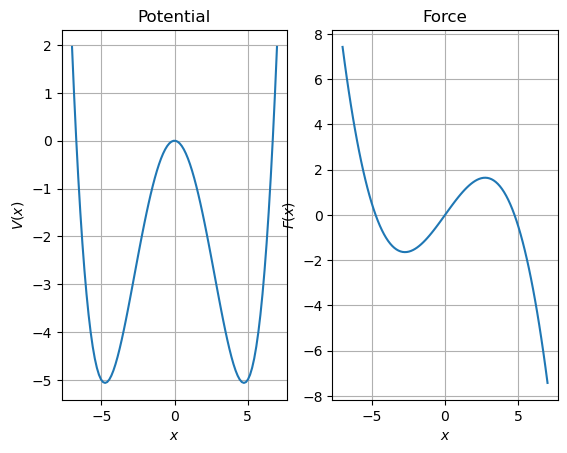

In [3]:

coeff=0.1*np.array([0,0,-4.5,0,0.1])
force_coeff=np.array([-coeff[1],-2*coeff[2],-3*coeff[3],-4*coeff[4]])

free_energy = np.polynomial.Polynomial(coeff)


#print(d_poly.convert().coef)

force_function = fl.functions.Polynomial(deg=3,coefficients=force_coeff)
diff_function= fl.functions.Polynomial(deg=0,coefficients=np.asarray([0.5]))
x_values = np.linspace(-7, 7, 100)

fig, axs = plt.subplots(1, 2)
axs[0].plot(x_values,free_energy(x_values))
axs[1].plot(x_values,force_function(x_values.reshape(len(x_values),1)))
axs[0].set_title("Potential")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$V(x)$")
axs[0].grid()

axs[1].set_title("Force") 
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$F(x)$") 
axs[1].grid()
#plt.show()

# x = np.linspace(-1, 1, 15).reshape(-1, 1)
# print(force_function._coefficients)




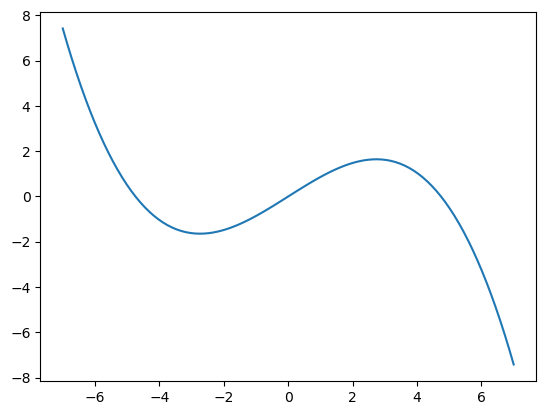

In [4]:
# p=fl.functions.Polynomial(deg=3,coefficients=np.asarray([0,2,1,0]))
# print(np.asarray(force_coeff))
force_function(np.asarray(x_values.reshape(100,1)))
# p(np.ones((5,1)))
plt.plot(x_values,force_function(np.asarray(x_values.reshape(len(x_values),1))))
# f=np.ones((5,1))
# x_values.reshape(100,1)
# x_values.shape

In [5]:
# def avg(vect):
    # return sum(vect)/len(vect)

In [6]:
#double_well_overdamped = fl.models.overdamped.Overdamped(poly)
#simulator = fl.simulations.ABMD_Simulator(fl.simulations.EulerStepper(double_well_overdamped), 1e-3, k=10.0, xstop=6.0)

model_simu = fl.models.overdamped.Overdamped(force_function,diffusion=diff_function)
simulator = fl.simulations.ABMD_Simulator(fl.simulations.EulerStepper(model_simu), 1e-3, k=1.0, xstop=6.0)

#model_simu = fl.models.BrownianMotion(mu=0)
# simulator = fl.simulations.Simulator(fl.simulations.EulerStepper(model_simu),1e-3)


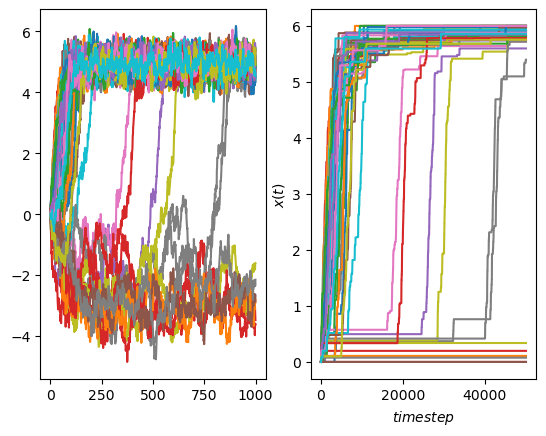

In [7]:
# initialize positions 
ntraj=50
q0= np.empty(ntraj)
for i in range(len(q0)):
    q0[i]=0
time_steps=50000
data = simulator.run(time_steps, q0, ntraj)
xmax = np.concatenate(simulator.xmax_hist, axis=1).T

# Plot the resulting trajectories
# sphinx_gallery_thumbnail_number = 1
means=[]
# fig, axs = plt.subplots()
# for n, trj in enumerate(data):
#     axs.plot(trj["x"])
#     #meanx=avg(trj["x"])*np.ones(time_steps)
#     #means.append(meanx[0])
#     axs.set_title("Overdamped ABMD with no bias")
#     axs.set_xlabel("$timestep$")
#     axs.set_ylabel("$x(t)$")
#     axs.grid()

fig, axs = plt.subplots(1,2)
for n, trj in enumerate(data):
    axs[0].plot(trj["x"])
    axs[1].plot(xmax[:, n])
    # meanx=avg(trj["x"])*np.ones(time_steps)
    # means.append(meanx[0])1.
    axs[1].set_xlabel("$timestep$")
    axs[1].set_ylabel("$x(t)$")
    axs[1].grid()
    

In [8]:
trj.keys()

dict_keys(['x', 'dt', 'bias'])

fig, axs = plt.subplots(1, 2)
axs[0].set_title("Force")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$F(x)$")
axs[0].grid()

axs[1].set_title("Force") # i think should be diffusion coefficient
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$D(x)$") 
axs[1].grid()


xfa = np.linspace(-7.0, 7.0, 75)
model_simu.remove_bias()
axs[0].plot(xfa, model_simu.force(xfa.reshape(-1, 1)), label="Exact")
axs[1].plot(xfa, model_simu.diffusion(xfa.reshape(-1, 1)), label="Exact")
for name, transitioncls in zip(
    ["Euler", "Ozaki", "ShojiOzaki", "Elerian", "Kessler", "Drozdov"],
    [
        fl.EulerDensity,
        fl.OzakiDensity,
        fl.ShojiOzakiDensity,
        fl.ElerianDensity,
        fl.KesslerDensity,
        fl.DrozdovDensity,
    ],
):
    estimator = fl.LikelihoodEstimator(transitioncls(fl.models.Overdamped(force_function,has_bias=True)))
    res = estimator.fit_fetch(data)
    print(res.coefficients)
    res.remove_bias()
    axs[0].plot(xfa, res.force(xfa.reshape(-1, 1)), label=name)
    axs[1].plot(xfa, res.diffusion(xfa.reshape(-1, 1)), label=name)
axs[0].legend()
axs[1].legend()
plt.show() 